<a href="https://colab.research.google.com/github/Pra201189/Assignments/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] =(16,8)
plt.rcParams['figure.dpi'] =120

In [ ]:
df=pd.read_csv("Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [ ]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
df.shape

(2126, 14)

In [ ]:
df.columns.tolist()

['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'DS',
 'DP',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Width',
 'Tendency',
 'NSP']

In [ ]:
df.dtypes.astype(str).to_dict()

{'LB': 'float64',
 'AC': 'float64',
 'FM': 'float64',
 'UC': 'float64',
 'DL': 'float64',
 'DS': 'float64',
 'DP': 'float64',
 'ASTV': 'float64',
 'MSTV': 'float64',
 'ALTV': 'float64',
 'MLTV': 'float64',
 'Width': 'float64',
 'Tendency': 'float64',
 'NSP': 'float64'}

In [ ]:
df.head().to_dict(orient='List')

{'LB': [120.0, 132.0, 133.0, 134.0, 131.94823162317192],
 'AC': [0.0, 0.006379585, 0.003322259, 0.002560819, 0.006514658],
 'FM': [0.0, 0.0, 0.0, 0.0, 0.0],
 'UC': [0.0, 0.006379585, 0.008305648, 0.00774188, 0.008143322],
 'DL': [0.0, 0.003189793, 0.003322259, 0.002560819, 0.0],
 'DS': [0.0, 0.0, 0.0, 0.0, 0.0],
 'DP': [0.0, 0.0, 0.0, 0.0, 0.0],
 'ASTV': [73.0, 17.0, 16.0, 16.0, 16.0],
 'MSTV': [0.5, 2.1, 2.1, 2.4, 2.4],
 'ALTV': [43.0, 0.0, 0.0, 0.0, 0.0],
 'MLTV': [2.4, 10.4, 13.4, 23.0, 19.9],
 'Width': [64.0, 130.0, 130.0, 117.0, 117.0],
 'Tendency': [0.9999260144416536, 0.0, 0.0, 1.0, 1.0],
 'NSP': [2.0, 1.0, 1.0, 1.0, 1.0]}

In [ ]:
#checking missing values
missing= df.isnull().sum().to_frame('missing count')
missing['missing_pct'] = 100*missing['missing count']/len(df)
missing


,missing count,missing_pct
LB,21,0.987770
AC,20,0.940734
FM,0,0.000000
UC,0,0.000000
DL,0,0.000000
DS,21,0.987770
DP,21,0.987770
ASTV,0,0.000000
MSTV,0,0.000000
ALTV,0,0.000000


In [ ]:
#Inspecting rows with missing values to decide strategy
rows_missing = df[df.isnull().any(axis=1)].head().T.to_dict()
rows_missing

{0: {'LB': 120.0,
  'AC': 0.0,
  'FM': 0.0,
  'UC': 0.0,
  'DL': 0.0,
  'DS': 0.0,
  'DP': 0.0,
  'ASTV': 73.0,
  'MSTV': 0.5,
  'ALTV': 43.0,
  'MLTV': 2.4,
  'Width': 64.0,
  'Tendency': 0.9999260144416536,
  'NSP': 2.0,
  'missing_pct': nan},
 1: {'LB': 132.0,
  'AC': 0.006379585,
  'FM': 0.0,
  'UC': 0.006379585,
  'DL': 0.003189793,
  'DS': 0.0,
  'DP': 0.0,
  'ASTV': 17.0,
  'MSTV': 2.1,
  'ALTV': 0.0,
  'MLTV': 10.4,
  'Width': 130.0,
  'Tendency': 0.0,
  'NSP': 1.0,
  'missing_pct': nan},
 2: {'LB': 133.0,
  'AC': 0.003322259,
  'FM': 0.0,
  'UC': 0.008305648,
  'DL': 0.003322259,
  'DS': 0.0,
  'DP': 0.0,
  'ASTV': 16.0,
  'MSTV': 2.1,
  'ALTV': 0.0,
  'MLTV': 13.4,
  'Width': 130.0,
  'Tendency': 0.0,
  'NSP': 1.0,
  'missing_pct': nan},
 3: {'LB': 134.0,
  'AC': 0.002560819,
  'FM': 0.0,
  'UC': 0.00774188,
  'DL': 0.002560819,
  'DS': 0.0,
  'DP': 0.0,
  'ASTV': 16.0,
  'MSTV': 2.4,
  'ALTV': 0.0,
  'MLTV': 23.0,
  'Width': 117.0,
  'Tendency': 1.0,
  'NSP': 1.0,
  'missing

In [ ]:
#Stratergy:since missingness is <1% for affected columns, we'll impute numeric columns with median
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_columns:
  if df[col].isnull().sum() > 0:
    med = df[col].median()
    df[col].fillna(med, inplace=True)
#confirm no missing value is remaining
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [ ]:
#convert any numeric strings if present (checked earlier the dtypes are numeric). Providing Statstical summary.
des =df.describe().T
des['IQR'] = des['75%'] - des['25%']
des_summary = des[['count', 'mean', 'std', 'min', 'max', '25%', '50%', '75%', 'IQR']].rename(columns={'50%':'median'})
des_summary


,count,mean,std,min,max,25%,median,75%,IQR
LB,2126.0,133.340204,11.214379,51.842487,214.000000,126.000000,133.000000,140.000000,14.000000
AC,2126.0,0.003204,0.004373,-0.019284,0.038567,0.000000,0.001634,0.005606,0.005606
FM,2126.0,0.009894,0.067540,-0.480634,0.961268,0.000000,0.000000,0.002567,0.002567
UC,2126.0,0.004391,0.003340,-0.014925,0.030002,0.001851,0.004484,0.006536,0.004685
DL,2126.0,0.001895,0.003343,-0.015393,0.030769,0.000000,0.000000,0.003289,0.003289
DS,2126.0,0.000002,0.000141,-0.001353,0.002706,0.000000,0.000000,0.000000,0.000000
DP,2126.0,0.000173,0.000836,-0.005348,0.010695,0.000000,0.000000,0.000000,0.000000
ASTV,2126.0,46.995984,18.813973,-63.000000,162.000000,32.000000,49.000000,61.000000,29.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,13.800000,0.700000,1.200000,1.700000,1.000000
ALTV,2126.0,10.285964,21.205041,-91.000000,182.000000,0.000000,0.000000,11.000000,11.000000


In [ ]:
#Identifying outliers using IQR method for each numeric column and count them.
outlier_counts = {}
for col in num_columns:
  q1= df[col].quantile(0.25)
  q3= df[col].quantile(0.75)
  iqr =q3-q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
  outlier_counts[col] = outlier_mask.sum()
outlier_counts

{'LB': np.int64(10),
 'AC': np.int64(43),
 'FM': np.int64(347),
 'UC': np.int64(13),
 'DL': np.int64(125),
 'DS': np.int64(120),
 'DP': np.int64(284),
 'ASTV': np.int64(10),
 'MSTV': np.int64(80),
 'ALTV': np.int64(318),
 'MLTV': np.int64(81),
 'Width': np.int64(10),
 'Tendency': np.int64(10),
 'NSP': np.int64(559),
 'missing_pct': np.int64(0)}

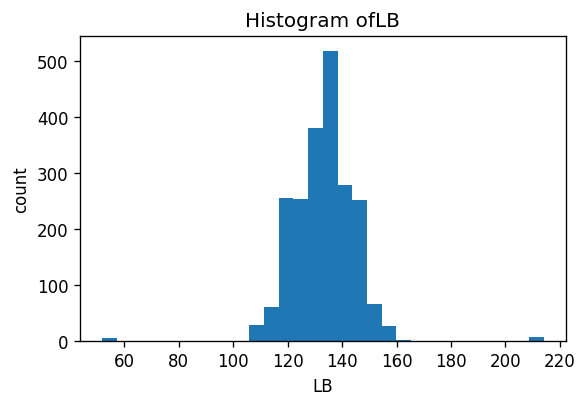

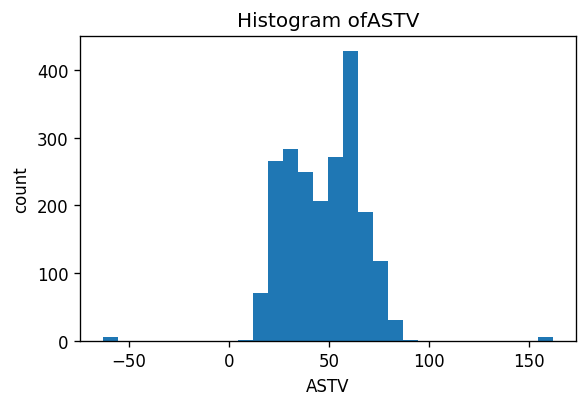

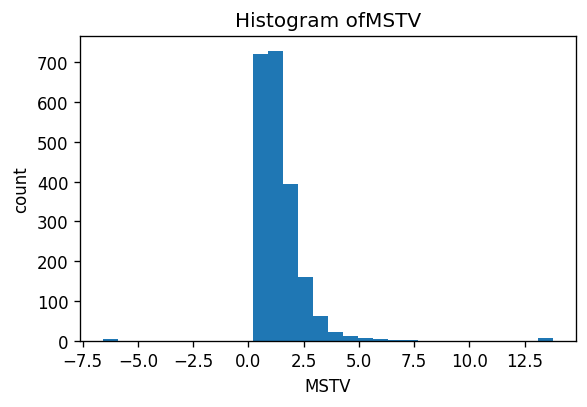

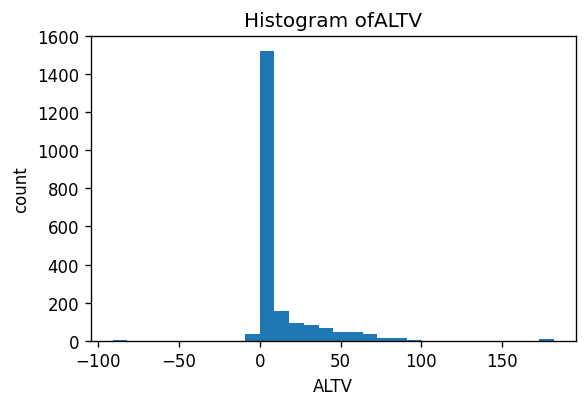

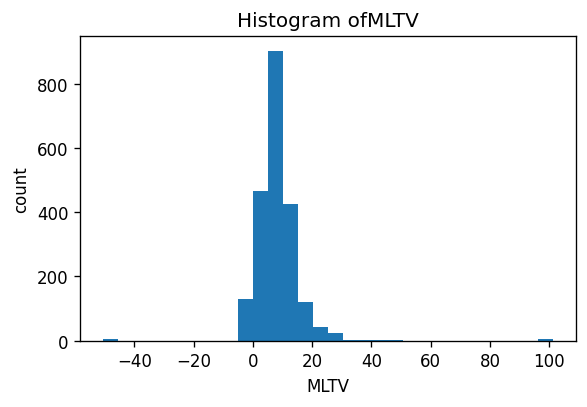

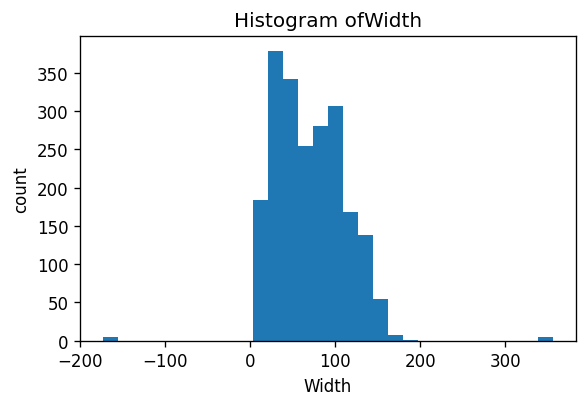

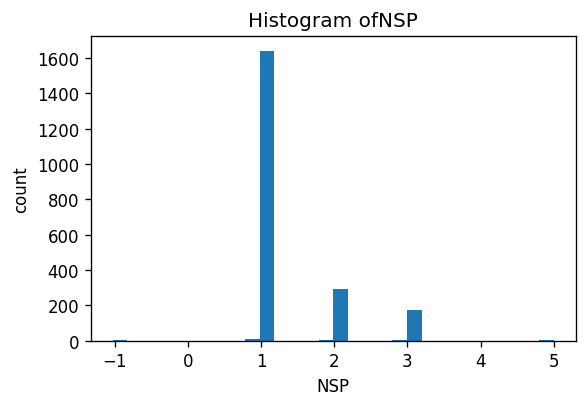

In [ ]:
#Histogram for selected numeric columns
selected = ['LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'NSP']
for col in selected:
  fig, ax = plt.subplots(figsize=(5,3.5))
  ax.hist(df[col], bins=30)
  ax.set_title(f"Histogram of{col}")
  ax.set_xlabel(col)
  ax.set_ylabel("count")
  plt.tight_layout()
  plt.show()

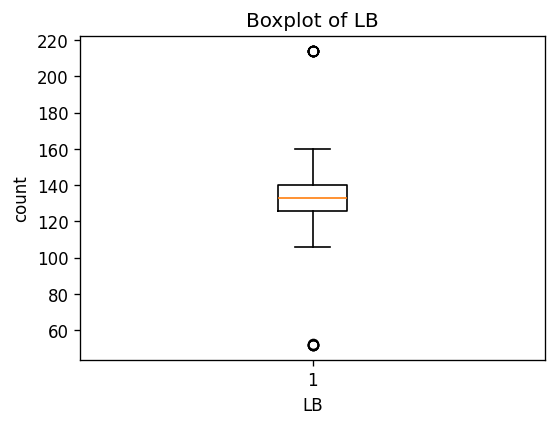

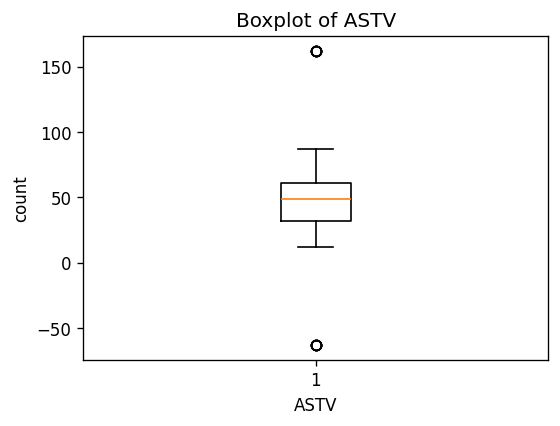

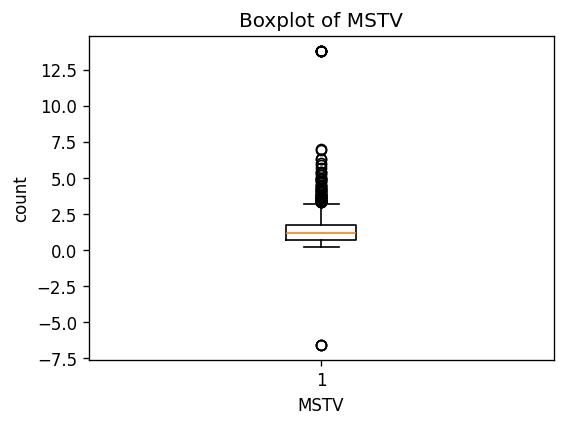

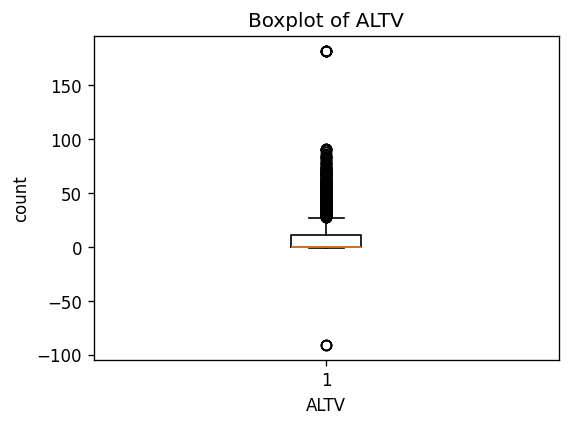

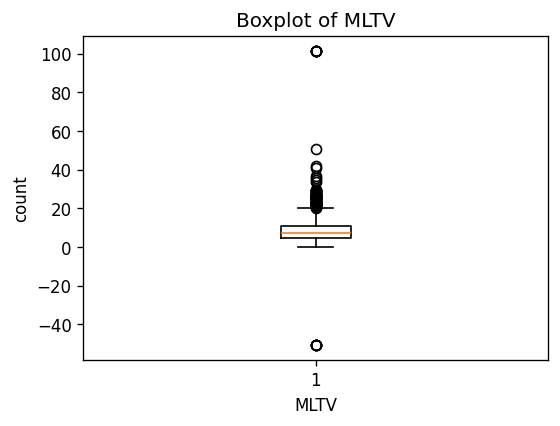

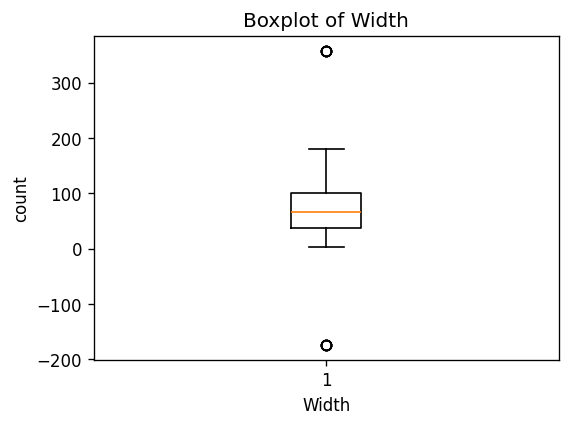

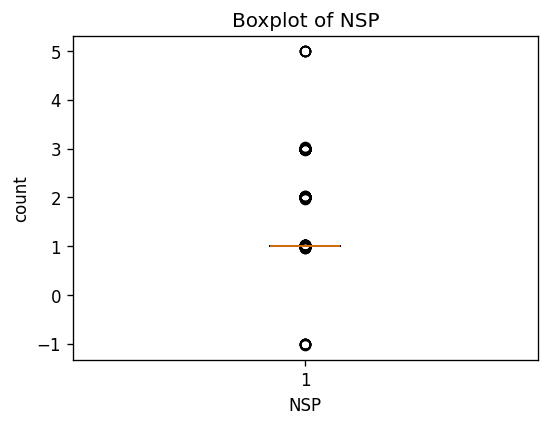

In [ ]:
#Boxplot for same columns
for col in selected:
  fig, ax = plt.subplots(figsize=(5,3.5))
  ax.boxplot(df[col])
  ax.set_title(f"Boxplot of {col}")
  ax.set_xlabel(col)
  ax.set_ylabel("count")
  plt.show()


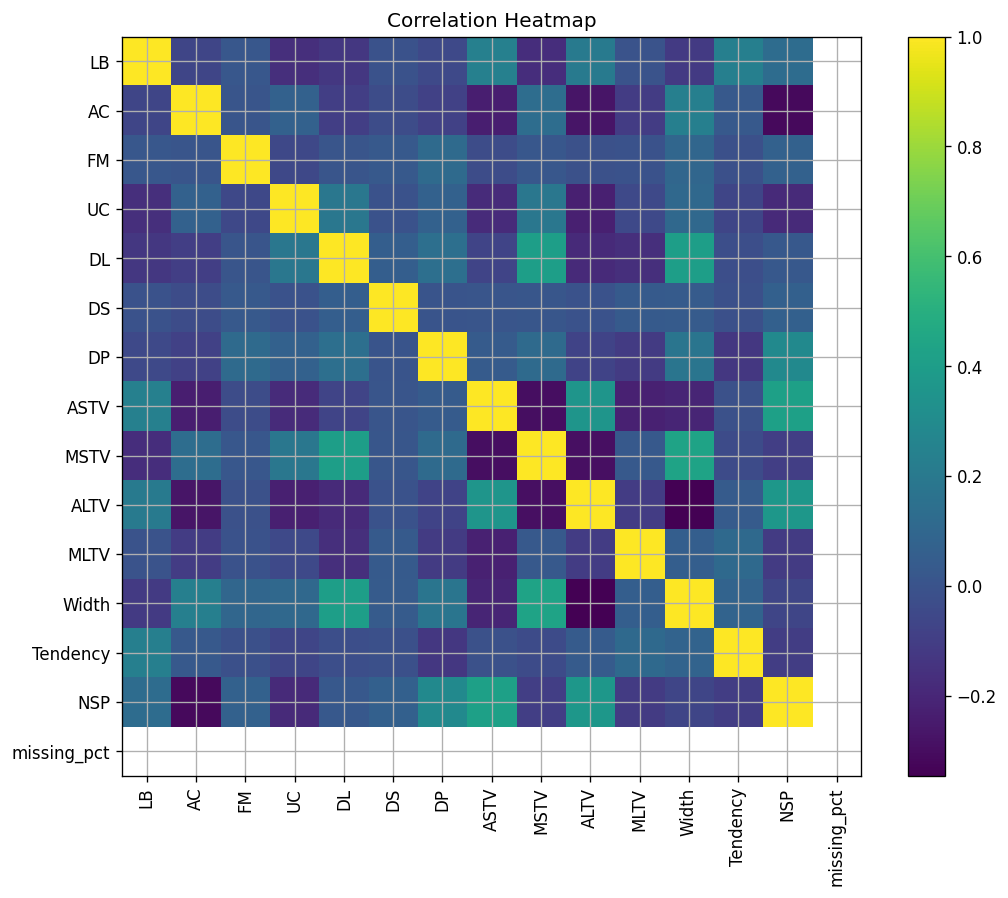

In [ ]:
#Correlation heatmap (matplotlib)
corr = df[num_columns].corr()
fig, ax = plt.subplots(figsize= (10,8))
cax = ax.imshow(corr, interpolation='nearest', cmap='viridis')
ax.grid(True)
plt.title("Correlation Heatmap")
plt.colorbar(cax)
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation= 'vertical')
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.show()


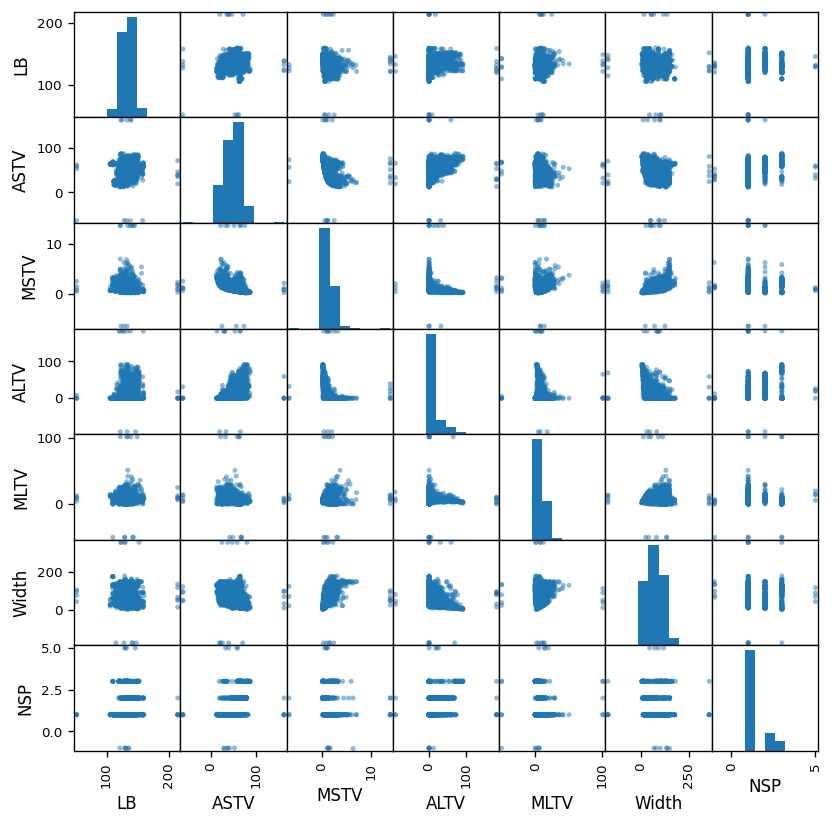

In [ ]:
#Scatter matrix for a subset to keep reasonable size.
subset =['LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'NSP']
fig = scatter_matrix(df[subset], figsize=(8,8), diagonal='hist')
plt.show()


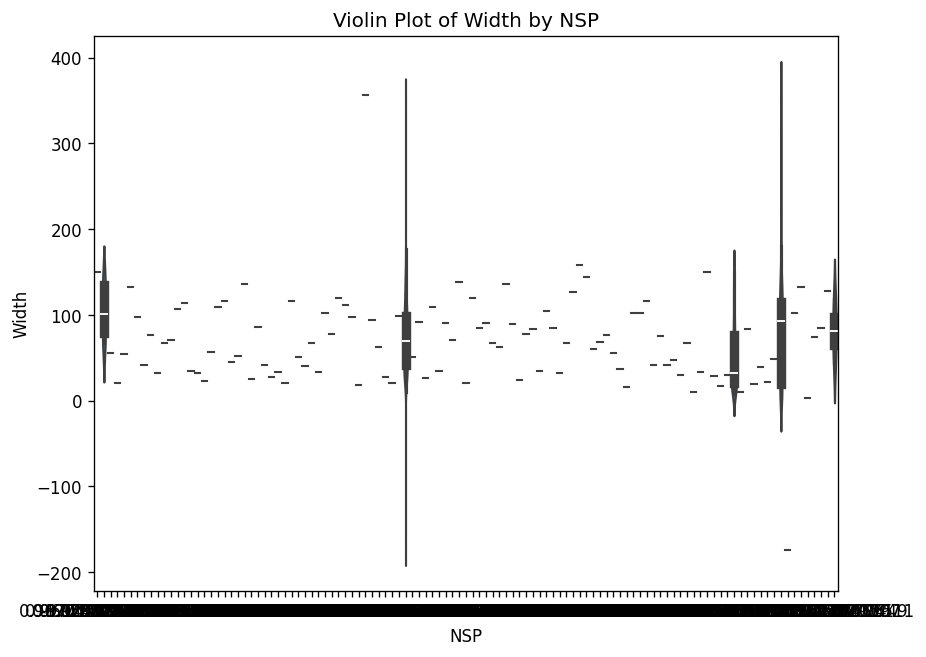

In [ ]:
#Violin Plot(distribution+density by class)
plt.figure(figsize=(8,6))
sns.violinplot(x='NSP', y="Width", data=df)
plt.title("Violin Plot of Width by NSP")
plt.xlabel("NSP")
plt.ylabel("Width")
plt.show()